# DATA606 Week 8 & 9 & 10 - Modeling
Team 2 UMBC Spring 2024

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

### File imports

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import set_config

import xgboost as xgb
import scipy.stats as stats

#visuals
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams


#model selection tools
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import KFold


#models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge

from datetime import datetime

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
def dateInRange(date,startDate,endDate):
  return startDate <= date <= endDate

def datetoCongress(date):
  if dateInRange(date, datetime(2023,1,3),datetime(2025,1,2)):
    return 118
  elif dateInRange(date, datetime(2021,1,3),datetime(2023,1,2)):
    return 117
  elif dateInRange(date, datetime(2019,1,3),datetime(2021,1,2)):
    return 116
  elif dateInRange(date, datetime(2017,1,3),datetime(2021,1,2)):
    return 115
  else:
    return 114

## Data Transformation

### Senator Approval Ratings and Demographic Data

In [ ]:
#df = pd.read_csv('/content/merged_votingpattern',parse_dates=['birthday','start_date','end_date'])
url = 'https://raw.githubusercontent.com/Ecross7/approvalRatings/main/Final_dataset3.csv'

In [ ]:
df = pd.read_csv(url,parse_dates=['birthday','start_date','end_date'])

In [ ]:
df = df.rename(columns={'Emotion (Majority)': 'emotion_majority', 'Race (Majority)': 'race_majority', 'Valence (Mean)': 'valence_mean'})

In [ ]:
df.columns

Index(['full_name', 'bioguide_id', 'govtrack_id', 'pct', 'birthday', 'gender',
       'election_date', 'party', 'senate_class', 'stage', 'cycle',
       'start_date', 'end_date', 'congressional', 'bills-introduced',
       'bills-with-companion', 'cosponsored', 'cosponsors', 'ideology',
       'leadership', 'missed-votes', 'Emotion', 'Norm_valence', 'Race', 'Val1',
       'Val2', 'Val3', 'Val_mean', 'Weight_val', 'Weighted_val_mean', 'age',
       'serving_age', 'emotion_majority'],
      dtype='object')

In [ ]:
df.dtypes

full_name                       object
bioguide_id                     object
govtrack_id                      int64
pct                            float64
birthday                datetime64[ns]
gender                          object
election_date                   object
party                           object
senate_class                   float64
stage                           object
cycle                            int64
start_date              datetime64[ns]
end_date                datetime64[ns]
congressional                    int64
bills-introduced               float64
bills-with-companion           float64
cosponsored                    float64
cosponsors                     float64
ideology                       float64
leadership                     float64
missed-votes                   float64
dtype: object

In [ ]:
#df['congressional'] = df['start_date'].apply(lambda x: datetoCongress(x))

In [ ]:
df

,full_name,bioguide_id,govtrack_id,pct,birthday,gender,election_date,party,senate_class,stage,...,start_date,end_date,congressional,bills-introduced,bills-with-companion,cosponsored,cosponsors,ideology,leadership,missed-votes
0,"Joe Manchin, III",M001183,412391,57.0,1947-08-24,M,2018-11-06,Democrat,1.0,general,...,2016-11-16,2016-11-17,114,20.0,5.0,181.0,86.0,0.153076,0.293970,0.199
1,Thomas R. Carper,C000174,300019,47.0,1947-01-23,M,2018-11-06,Democrat,1.0,general,...,2018-07-24,2018-07-29,115,23.0,4.0,143.0,98.0,0.135845,0.264322,0.167
2,Kyrsten Sinema,S001191,412509,42.7,1976-07-12,F,2018-11-06,Independent,1.0,general,...,2018-10-24,2018-10-30,116,32.0,7.0,216.0,175.0,0.232713,0.362902,0.694
3,Kyrsten Sinema,S001191,412509,46.0,1976-07-12,F,2018-11-06,Independent,1.0,general,...,2018-10-27,2018-10-29,116,32.0,7.0,216.0,175.0,0.232713,0.362902,0.694
4,Kyrsten Sinema,S001191,412509,45.0,1976-07-12,F,2018-11-06,Independent,1.0,general,...,2018-10-27,2018-10-29,116,32.0,7.0,216.0,175.0,0.232713,0.362902,0.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596,Marco Rubio,R000595,412491,51.0,1971-05-28,M,2022-11-08,Republican,3.0,general,...,2022-10-20,2022-10-31,117,218.0,72.0,907.0,1349.0,1.000000,1.000000,21.707
2597,Marco Rubio,R000595,412491,51.0,1971-05-28,M,2022-11-08,Republican,3.0,general,...,2022-10-30,2022-11-01,117,218.0,72.0,907.0,1349.0,1.000000,1.000000,21.707
2598,Marco Rubio,R000595,412491,49.7,1971-05-28,M,2022-11-08,Republican,3.0,general,...,2022-10-30,2022-11-01,117,218.0,72.0,907.0,1349.0,1.000000,1.000000,21.707
2599,Marco Rubio,R000595,412491,51.0,1971-05-28,M,2022-11-08,Republican,3.0,general,...,2022-11-01,2022-11-01,117,218.0,72.0,907.0,1349.0,1.000000,1.000000,21.707


In [ ]:
df.describe()

,govtrack_id,pct,birthday,senate_class,cycle,start_date,end_date,congressional,bills-introduced,bills-with-companion,...,missed-votes,Norm_valence,Val1,Val2,Val3,Val_mean,Weight_val,Weighted_val_mean,age,serving_age
count,2181.000000,2181.000000,2181,2181.000000,2181.000000,2181,2181,2181.000000,2181.000000,2181.000000,...,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000
mean,399343.690050,46.739798,1958-12-24 00:29:42.668500672,1.806052,2019.430536,2020-01-08 03:06:51.004126464,2020-01-13 00:55:27.647867904,115.920220,58.529574,17.087575,...,3.800813,47.621890,0.163369,0.077625,0.197161,9.274742,13.311744,0.146052,63.706098,60.525447
min,300018.000000,10.500000,1933-06-22 00:00:00,1.000000,2018.000000,2016-11-16 00:00:00,2016-11-17 00:00:00,114.000000,0.000000,0.000000,...,0.000000,-0.553504,-0.198000,-0.297000,-0.297000,-97.255810,-38.817667,-0.198000,37.000000,33.000000
25%,412194.000000,44.000000,1952-06-06 00:00:00,1.000000,2018.000000,2018-09-27 00:00:00,2018-10-02 00:00:00,115.000000,37.000000,10.000000,...,0.948000,31.259388,-0.088000,-0.172000,-0.098000,-12.103210,-0.136211,-0.124667,55.000000,55.000000
50%,412495.000000,47.000000,1957-08-02 00:00:00,2.000000,2020.000000,2020-03-12 00:00:00,2020-03-15 00:00:00,116.000000,52.000000,14.000000,...,1.944000,44.797374,0.264000,0.168000,0.217000,4.276279,10.890920,0.209000,65.000000,62.000000
75%,412742.000000,50.300000,1964-11-28 00:00:00,3.000000,2020.000000,2020-10-23 00:00:00,2020-10-26 00:00:00,116.000000,74.000000,19.000000,...,4.341000,64.413596,0.396000,0.297000,0.495000,32.791158,26.127828,0.396000,72.000000,67.000000
max,456858.000000,75.000000,1987-02-16 00:00:00,3.000000,2024.000000,2022-12-19 00:00:00,2022-12-20 00:00:00,117.000000,218.000000,72.000000,...,55.139000,99.222004,0.400000,0.300000,0.500000,99.205422,59.526603,0.400000,91.000000,85.000000
std,48419.094874,6.543313,NaN,0.817515,1.501181,NaN,NaN,0.712959,38.534872,13.546764,...,5.264011,20.849389,0.226860,0.219624,0.288976,35.955894,18.441266,0.244011,11.229234,9.598735


In [ ]:
df.shape

(2601, 21)

In [ ]:
# Could we use Initial term age instead?
def calculate_servingAge(dtob,startdate):
  # Calculate the age by subtracting the birth year from the current year
  # Adjust the age if the birth month and day are after today's month and day
  return startdate.year - dtob.year - ((startdate.month, startdate.day) < (dtob.month, dtob.day))


In [ ]:
# create serving_age column from birthday to start of cycle
df['serving_age'] = df.apply(lambda row : (calculate_servingAge(row.birthday, row.start_date)), axis=1 )

In [ ]:
df.head()

,full_name,bioguide_id,govtrack_id,pct,birthday,gender,election_date,party,senate_class,stage,...,end_date,congressional,bills-introduced,bills-with-companion,cosponsored,cosponsors,ideology,leadership,missed-votes,serving_age
0,"Joe Manchin, III",M001183,412391,57.0,1947-08-24,M,2018-11-06,Democrat,1.0,general,...,2016-11-17,114,20.0,5.0,181.0,86.0,0.153076,0.293970,0.199,69
1,Thomas R. Carper,C000174,300019,47.0,1947-01-23,M,2018-11-06,Democrat,1.0,general,...,2018-07-29,115,23.0,4.0,143.0,98.0,0.135845,0.264322,0.167,71
2,Kyrsten Sinema,S001191,412509,42.7,1976-07-12,F,2018-11-06,Independent,1.0,general,...,2018-10-30,116,32.0,7.0,216.0,175.0,0.232713,0.362902,0.694,42
3,Kyrsten Sinema,S001191,412509,46.0,1976-07-12,F,2018-11-06,Independent,1.0,general,...,2018-10-29,116,32.0,7.0,216.0,175.0,0.232713,0.362902,0.694,42
4,Kyrsten Sinema,S001191,412509,45.0,1976-07-12,F,2018-11-06,Independent,1.0,general,...,2018-10-29,116,32.0,7.0,216.0,175.0,0.232713,0.362902,0.694,42


In [ ]:
df

,full_name,bioguide_id,govtrack_id,pct,birthday,gender,election_date,party,senate_class,stage,...,end_date,congressional,bills-introduced,bills-with-companion,cosponsored,cosponsors,ideology,leadership,missed-votes,serving_age
0,"Joe Manchin, III",M001183,412391,57.0,1947-08-24,M,2018-11-06,Democrat,1.0,general,...,2016-11-17,114,20.0,5.0,181.0,86.0,0.153076,0.293970,0.199,69
1,Thomas R. Carper,C000174,300019,47.0,1947-01-23,M,2018-11-06,Democrat,1.0,general,...,2018-07-29,115,23.0,4.0,143.0,98.0,0.135845,0.264322,0.167,71
2,Kyrsten Sinema,S001191,412509,42.7,1976-07-12,F,2018-11-06,Independent,1.0,general,...,2018-10-30,116,32.0,7.0,216.0,175.0,0.232713,0.362902,0.694,42
3,Kyrsten Sinema,S001191,412509,46.0,1976-07-12,F,2018-11-06,Independent,1.0,general,...,2018-10-29,116,32.0,7.0,216.0,175.0,0.232713,0.362902,0.694,42
4,Kyrsten Sinema,S001191,412509,45.0,1976-07-12,F,2018-11-06,Independent,1.0,general,...,2018-10-29,116,32.0,7.0,216.0,175.0,0.232713,0.362902,0.694,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596,Marco Rubio,R000595,412491,51.0,1971-05-28,M,2022-11-08,Republican,3.0,general,...,2022-10-31,117,218.0,72.0,907.0,1349.0,1.000000,1.000000,21.707,51
2597,Marco Rubio,R000595,412491,51.0,1971-05-28,M,2022-11-08,Republican,3.0,general,...,2022-11-01,117,218.0,72.0,907.0,1349.0,1.000000,1.000000,21.707,51
2598,Marco Rubio,R000595,412491,49.7,1971-05-28,M,2022-11-08,Republican,3.0,general,...,2022-11-01,117,218.0,72.0,907.0,1349.0,1.000000,1.000000,21.707,51
2599,Marco Rubio,R000595,412491,51.0,1971-05-28,M,2022-11-08,Republican,3.0,general,...,2022-11-01,117,218.0,72.0,907.0,1349.0,1.000000,1.000000,21.707,51


from matplotlib import pyplot as plt
df['govtrack_id'].plot(kind='hist', bins=20, title='govtrack_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['pct'].plot(kind='hist', bins=20, title='pct')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['senate_class'].plot(kind='hist', bins=20, title='senate_class')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['cycle'].plot(kind='hist', bins=20, title='cycle')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('election_date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('party').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('stage').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='govtrack_id', y='pct', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='pct', y='senate_class', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='senate_class', y='cycle', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='cycle', y='congressional', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['birthday']
  ys = series['govtrack_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('birthday', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('birthday')
_ = plt.ylabel('govtrack_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['birthday']
  ys = series['govtrack_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('birthday', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('election_date')):
  _plot_series(series, series_name, i)
  fig.legend(title='election_date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('birthday')
_ = plt.ylabel('govtrack_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['birthday']
  ys = series['govtrack_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('birthday', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('party')):
  _plot_series(series, series_name, i)
  fig.legend(title='party', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('birthday')
_ = plt.ylabel('govtrack_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['birthday']
  ys = series['govtrack_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('birthday', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('stage')):
  _plot_series(series, series_name, i)
  fig.legend(title='stage', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('birthday')
_ = plt.ylabel('govtrack_id')

from matplotlib import pyplot as plt
df['govtrack_id'].plot(kind='line', figsize=(8, 4), title='govtrack_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['pct'].plot(kind='line', figsize=(8, 4), title='pct')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['senate_class'].plot(kind='line', figsize=(8, 4), title='senate_class')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['cycle'].plot(kind='line', figsize=(8, 4), title='cycle')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['election_date'].value_counts()
    for x_label, grp in df.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('election_date')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['party'].value_counts()
    for x_label, grp in df.groupby('election_date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('election_date')
_ = plt.ylabel('party')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['stage'].value_counts()
    for x_label, grp in df.groupby('party')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('party')
_ = plt.ylabel('stage')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='govtrack_id', y='gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['election_date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='govtrack_id', y='election_date', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['party'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='govtrack_id', y='party', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['stage'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='govtrack_id', y='stage', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

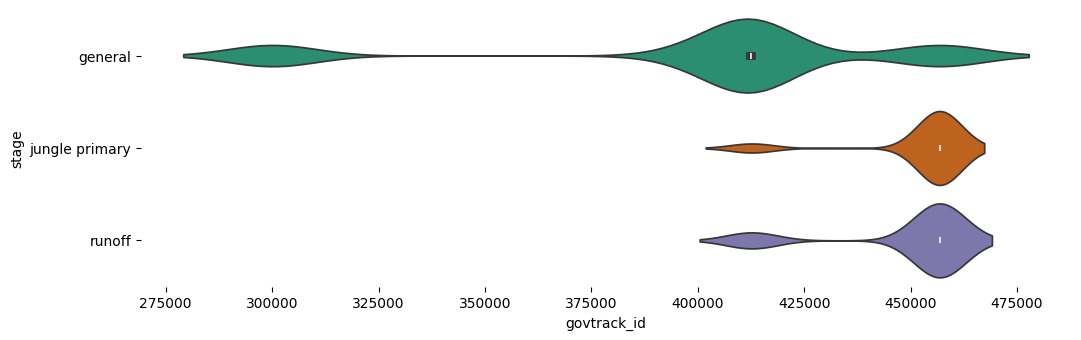

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['stage'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='govtrack_id', y='stage', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

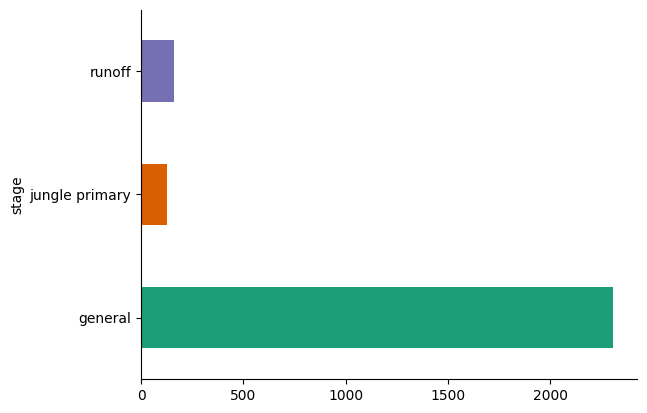

In [ ]:
# @title stage

df.groupby('stage').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

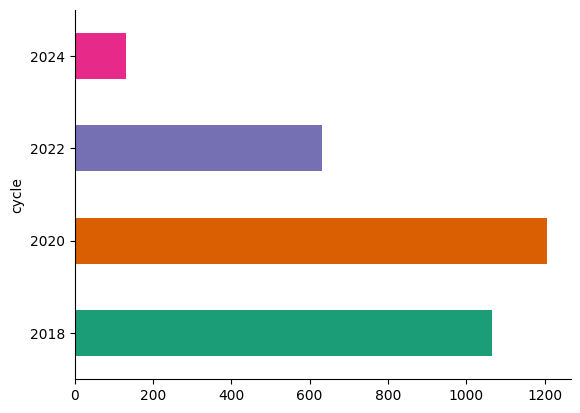

In [ ]:
# @title cycle

df.groupby('cycle').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

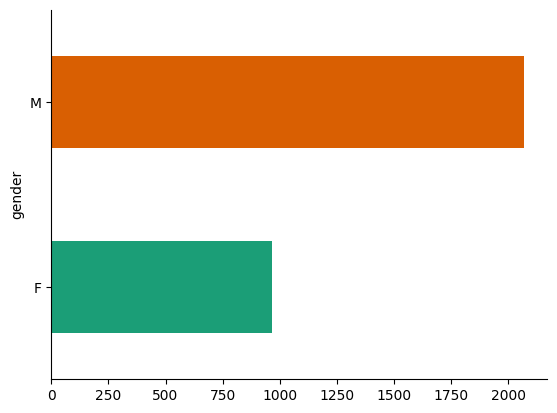

In [ ]:
# @title gender

df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

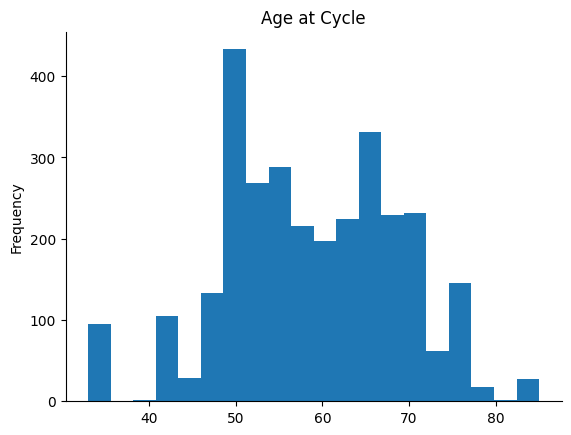

In [ ]:
df['serving_age'].plot(kind='hist', bins=20, title='Age at Cycle')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

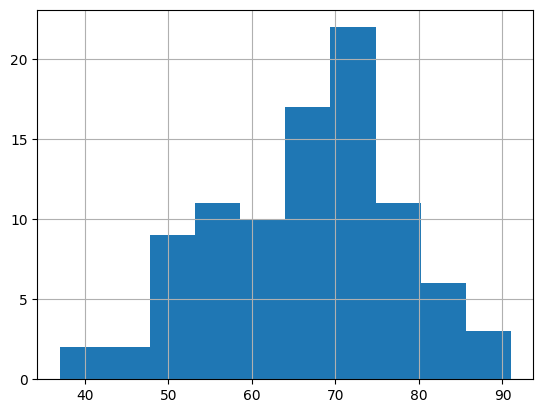

In [ ]:
df.groupby('full_name')['age'].max().hist()

### TODO:
1) add the age at the time of serving -- done ✅

2) grab more features

<Axes: >

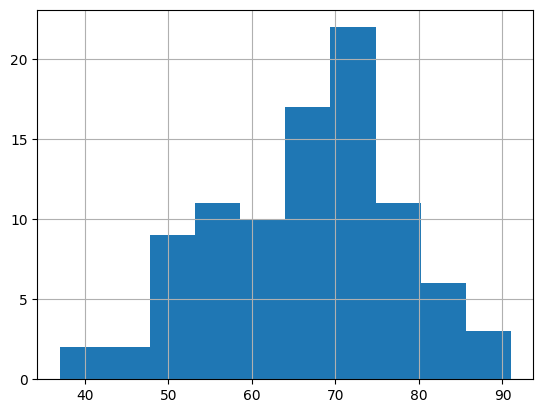

In [ ]:
df.groupby('full_name')['age'].max().hist()

In [ ]:
# todo: start_date & end_date -> How do we want to handle?

### TODO: Senator Photo Enrichment
3 - 20 Photos of senators at various events and points in time

In [ ]:
# TODO: Analysis on number and types of images available

### TODO: Emotion Detection
Classification and Valence scores

In [ ]:
# todo: update with real inferences

In [ ]:
# generating random valence values as a placeholder
#emotions = ['engagement','happiness','anticipation','excitement','confidence','pleasure','peace','disconnection','affection','esteem','sympathy']
#df['top_emotion'] = np.random.choice(emotions, size=len(df))

#df['valence'] = np.random.randint(0,10, size=len(df))

In [ ]:
df['valence_mean'].describe()

count    3035.000000
mean       26.044160
std        38.443499
min       -73.293255
25%         5.415104
50%        27.554999
75%        56.318169
max        99.428934
Name: valence_mean, dtype: float64

In [ ]:
df['race_majority'].value_counts()

race_majority
white              2695
black               218
latino hispanic     111
asian                11
Name: count, dtype: int64

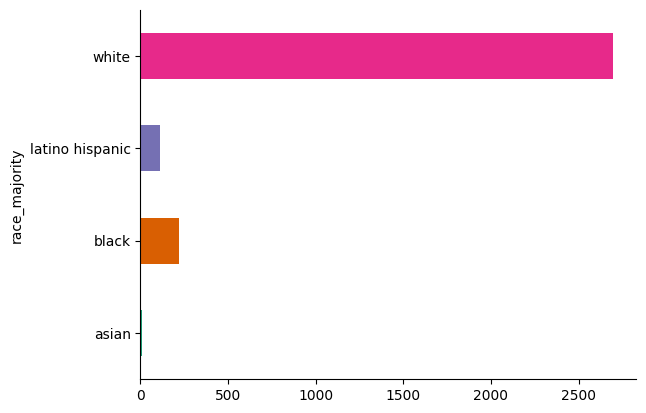

In [ ]:

df.groupby('race_majority').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['emotion_majority'].value_counts()

emotion_majority
happy       2117
neutral      329
sad          329
angry        159
fear          90
surprise      11
Name: count, dtype: int64

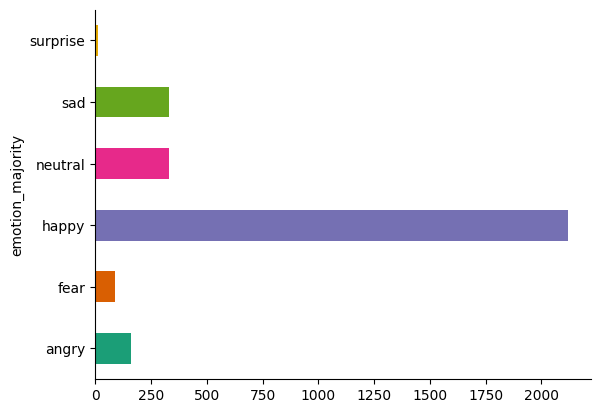

In [ ]:
df.groupby('emotion_majority').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# TODO: General EDA on the distribution of emotion inferences like frequency of emotion class and averge valence

### Final Feature Selection

In [ ]:
# create heatmap to view correlations
#sns.set(font_scale = 1)
#plt.figure(figsize = (10,10))
#sns.heatmap(df.corr(), annot=True)

In [ ]:
df['congressional'] = df['congressional'].astype(str)

In [ ]:
df.head()

,full_name,bioguide_id,govtrack_id,pct,birthday,gender,election_date,party,senate_class,stage,...,Race,Val1,Val2,Val3,Val_mean,Weight_val,Weighted_val_mean,age,serving_age,emotion_majority
0,amy_klobuchar,K000367,412242,60.0,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,-0.099,-0.198,-0.297,46.458843,32.722343,-0.198,64.0,58,happy
1,amy_klobuchar,K000367,412242,57.0,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,-0.070,-0.134,-0.174,46.458843,32.722343,-0.126,64.0,58,happy
2,amy_klobuchar,K000367,412242,53.0,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,0.396,0.297,0.495,46.458843,32.722343,0.396,64.0,58,happy
3,amy_klobuchar,K000367,412242,53.6,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,0.396,0.297,0.495,46.458843,32.722343,0.396,64.0,58,happy
4,amy_klobuchar,K000367,412242,53.0,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,0.396,0.297,0.495,46.458843,32.722343,0.396,64.0,58,happy


In [ ]:
df.columns

Index(['full_name', 'bioguide_id', 'govtrack_id', 'pct', 'birthday', 'gender',
       'election_date', 'party', 'senate_class', 'stage', 'cycle',
       'start_date', 'end_date', 'congressional', 'bills-introduced',
       'bills-with-companion', 'cosponsored', 'cosponsors', 'ideology',
       'leadership', 'missed-votes', 'Emotion', 'Norm_valence', 'Race', 'Val1',
       'Val2', 'Val3', 'Val_mean', 'Weight_val', 'Weighted_val_mean', 'age',
       'serving_age', 'emotion_majority'],
      dtype='object')

In [90]:
target = ['pct'] # could we do binary classification with positive or negative score?
date_features = ['start_date','end_date','birthday'] # is cycle really "date" or categorical?
categorical_features = ['gender','party','senate_class','stage','cycle','congressional','emotion_majority', 'Race']
numerical_features = ['serving_age','bills-introduced','bills-with-companion', 'cosponsored','cosponsors',
  'ideology','leadership', 'missed-votes', 'Norm_valence', 'Val1','Val2', 'Val3', 'Val_mean', 'Weight_val', 'Weighted_val_mean']

### Train/Test Split

In [ ]:
df

,full_name,bioguide_id,govtrack_id,pct,birthday,gender,election_date,party,senate_class,stage,...,Race,Val1,Val2,Val3,Val_mean,Weight_val,Weighted_val_mean,age,serving_age,emotion_majority
0,amy_klobuchar,K000367,412242,60.0,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,-0.099,-0.198,-0.297,46.458843,32.722343,-0.198,64.0,58,happy
1,amy_klobuchar,K000367,412242,57.0,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,-0.070,-0.134,-0.174,46.458843,32.722343,-0.126,64.0,58,happy
2,amy_klobuchar,K000367,412242,53.0,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,0.396,0.297,0.495,46.458843,32.722343,0.396,64.0,58,happy
3,amy_klobuchar,K000367,412242,53.6,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,0.396,0.297,0.495,46.458843,32.722343,0.396,64.0,58,happy
4,amy_klobuchar,K000367,412242,53.0,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,0.396,0.297,0.495,46.458843,32.722343,0.396,64.0,58,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589,tommy_tuberville,T000278,456796,49.7,1954-09-18,M,2020-11-03,Republican,2.0,general,...,white,0.392,0.294,0.490,-80.875681,-31.057802,0.392,72.0,65,neutral
2590,tommy_tuberville,T000278,456796,47.0,1954-09-18,M,2020-11-03,Republican,2.0,general,...,white,-0.160,-0.254,-0.150,-80.875681,-31.057802,-0.188,72.0,65,neutral
2591,tommy_tuberville,T000278,456796,50.0,1954-09-18,M,2020-11-03,Republican,2.0,general,...,white,-0.120,-0.182,-0.070,-80.875681,-31.057802,-0.124,72.0,65,neutral
2592,tommy_tuberville,T000278,456796,52.0,1954-09-18,M,2020-11-03,Republican,2.0,general,...,white,-0.089,-0.186,-0.109,-80.875681,-31.057802,-0.128,72.0,65,neutral


In [ ]:
cond = df['Emotion'].isnull()
df[cond]

,full_name,bioguide_id,govtrack_id,pct,birthday,gender,election_date,party,senate_class,stage,...,Race,Val1,Val2,Val3,Val_mean,Weight_val,Weighted_val_mean,age,serving_age,emotion_majority


In [ ]:
df.isnull().sum()

full_name                 0
bioguide_id               0
govtrack_id               0
pct                       0
birthday                  0
gender                    0
election_date             0
party                     0
senate_class              0
stage                     0
cycle                     0
start_date                0
end_date                  0
congressional             0
bills-introduced          0
bills-with-companion      0
cosponsored               0
cosponsors                0
ideology                  0
leadership                0
missed-votes              0
Emotion                 407
Norm_valence            413
Race                    407
Val1                    407
Val2                    407
Val3                    407
Val_mean                413
Weight_val              413
Weighted_val_mean       407
age                     407
serving_age               0
emotion_majority          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601 entries, 0 to 2600
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   full_name             2601 non-null   object        
 1   bioguide_id           2601 non-null   object        
 2   govtrack_id           2601 non-null   int64         
 3   pct                   2601 non-null   float64       
 4   birthday              2601 non-null   datetime64[ns]
 5   gender                2601 non-null   object        
 6   election_date         2601 non-null   object        
 7   party                 2601 non-null   object        
 8   senate_class          2601 non-null   float64       
 9   stage                 2601 non-null   object        
 10  cycle                 2601 non-null   int64         
 11  start_date            2601 non-null   datetime64[ns]
 12  end_date              2601 non-null   datetime64[ns]
 13  congressional     

In [ ]:
#df[categorical_features] = df[categorical_features].astype(str)

In [91]:
#using random shuffle
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features],df[target], test_size=0.2, random_state=42)

In [ ]:
X_train

,gender,party,senate_class,stage,cycle,congressional,emotion_majority,Race,serving_age,bills-introduced,...,ideology,leadership,missed-votes,Norm_valence,Val1,Val2,Val3,Val_mean,Weight_val,Weighted_val_mean
264,M,Republican,2.0,general,2020,116,neutral,white,46,87.0,...,0.839497,0.642332,5.556,18.467571,-0.068,-0.166,-0.062,-55.750869,-18.456897,-0.098667
1679,M,Democrat,2.0,general,2020,116,happy,white,65,54.0,...,0.698164,0.518280,2.778,31.259388,0.392,0.294,0.490,-28.639181,-5.082788,0.392000
1646,M,Democrat,3.0,general,2020,116,angry,latino hispanic,55,0.0,...,0.000000,0.000000,0.000,20.992952,-0.096,-0.169,-0.167,-35.519531,-9.895055,-0.144000
2150,M,Republican,1.0,general,2018,116,angry,white,65,49.0,...,0.608876,0.495382,1.944,10.083585,-0.069,-0.138,-0.207,-35.515222,-12.097253,-0.138000
1863,M,Republican,2.0,general,2020,116,happy,white,78,46.0,...,0.462246,0.466232,1.806,31.259388,0.140,0.096,0.178,-28.639181,-5.082788,0.138000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,M,Republican,3.0,general,2022,117,happy,white,51,137.0,...,0.932282,0.830537,11.907,31.259388,0.362,0.271,0.449,-28.639181,-5.082788,0.360667
1243,F,Independent,1.0,general,2018,116,happy,white,41,32.0,...,0.232713,0.362902,0.694,64.413596,0.392,0.294,0.490,44.178333,30.594932,0.392000
1283,F,Independent,1.0,general,2018,116,happy,white,41,32.0,...,0.232713,0.362902,0.694,52.950342,-0.099,-0.198,-0.099,21.308727,19.177482,-0.132000
1458,M,Republican,3.0,general,2022,117,neutral,white,51,218.0,...,1.000000,1.000000,21.707,49.689689,0.396,0.297,0.495,0.574318,10.266888,0.396000


### Normalize Numeric Features

In [92]:

# separate pipeline for numeric so more flexible with real data
num_pipe = Pipeline([
  ('min_scaler', MinMaxScaler())
])

In [ ]:
'''
#separate pipeline for numeric so more flexible with real data
num_pipe = Pipeline([
  ('std_scaler', StandardScaler())
])
'''

### Feat Pipeline

In [93]:
ctprocessor = ColumnTransformer(
  transformers=[
  ('numerical', num_pipe,numerical_features ),
  ('cat', OneHotEncoder(handle_unknown="ignore", drop='if_binary'),categorical_features),
  ],
  remainder='drop'
)

In [94]:
#display
set_config(display='diagram')
display(ctprocessor)

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('min_scaler',
                                                  MinMaxScaler())]),
                                 ['serving_age', 'bills-introduced',
                                  'bills-with-companion', 'cosponsored',
                                  'cosponsors', 'ideology', 'leadership',
                                  'missed-votes', 'Norm_valence', 'Val1',
                                  'Val2', 'Val3', 'Val_mean', 'Weight_val',
                                  'Weighted_val_mean']),
                                ('cat',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore'),
                                 ['gender', 'party', 'senate_class', 'stage',
                                  'cycle', 'congressional', 'emotion_majority',
                                  'Race'])])

## Modeling

### Helper functions

In [ ]:
## helper function for ensembling models
# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
    cv = KFold(n_splits=4)
    pipeline = Pipeline(steps=[('preprocessor', ctprocessor), ('model',model)])

    avg_mse_score = -1*np.mean(cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='neg_mean_squared_error'))
    avg_mae_score = -1*np.mean(cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error'))
    avg_r2_score = np.mean(cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='r2'))

    return {'mse':avg_mse_score,'mae':avg_mae_score,'r2':avg_r2_score}

### Supervised Modeling - Traditional Methods

In [95]:
ctprocessor.set_output(transform='default')

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('min_scaler',
                                                  MinMaxScaler())]),
                                 ['serving_age', 'bills-introduced',
                                  'bills-with-companion', 'cosponsored',
                                  'cosponsors', 'ideology', 'leadership',
                                  'missed-votes', 'Norm_valence', 'Val1',
                                  'Val2', 'Val3', 'Val_mean', 'Weight_val',
                                  'Weighted_val_mean']),
                                ('cat',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore'),
                                 ['gender', 'party', 'senate_class', 'stage',
                                  'cycle', 'congressional', 'emotion_majority',
                                  'Race'])])

#### Linear Regression
Numeric features are standardized using StandardScaler and Categorical features One Hot Encoding

In [96]:
lr = LinearRegression()

In [97]:
lr_pipeline = Pipeline(steps=[('preprocessor', ctprocessor), ('model',lr)])
lr_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('min_scaler',
                                                                   MinMaxScaler())]),
                                                  ['serving_age',
                                                   'bills-introduced',
                                                   'bills-with-companion',
                                                   'cosponsored', 'cosponsors',
                                                   'ideology', 'leadership',
                                                   'missed-votes',
                                                   'Norm_valence', 'Val1',
                                                   'Val2', 'Val3', 'Val_mean',
                                                   'Weight_val',
                                                   'Weighted_val_mean']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'party',
                                                   'senate_class', 'stage',
                                                   'cycle', 'congressional',
                                                   'emotion_majority',
                                                   'Race'])])),
                ('model', LinearRegression())])

##### Training Scores
Refer to this for evaluation of train/test scores: https://datascience.stackexchange.com/questions/70054/interpretation-for-test-score-training-score-and-validation-score-in-machine-l

In [98]:
lr_train_scores = evaluate_model(lr,X_train,y_train)
lr_train_scores

{'mse': 1.2903039081812146e+25,
 'mae': 86014717253.73946,
 'r2': -2.6194417223992524e+23}

##### Testing Scores

In [99]:
lr_scores = evaluate_model(lr,X_test,y_test)
lr_scores

{'mse': 5.987338634575706e+20,
 'mae': 1171854434.3554752,
 'r2': -1.4389507751109218e+19}

#### Decision Tree

NOTE: SKLearn's Decision Tree Algorithm DOES NOT allow direct use of cateogrical features. Not clear if there is a Python package that supports this. LabelEncoding only works if there is a nominal relationship in the features.

AKA don't need encoded categorical features

In [100]:
# https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/
dtr_parameters = {'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [101]:
dtr = DecisionTreeRegressor(random_state=0)

In [102]:
dtr_pipeline = Pipeline(steps=[('preprocessor', ctprocessor), ('model',GridSearchCV(dtr, dtr_parameters, n_jobs=2))])
dtr_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('min_scaler',
                                                                   MinMaxScaler())]),
                                                  ['serving_age',
                                                   'bills-introduced',
                                                   'bills-with-companion',
                                                   'cosponsored', 'cosponsors',
                                                   'ideology', 'leadership',
                                                   'missed-votes',
                                                   'Norm_valence', 'Val1',
                                                   'Val2', 'Val3', 'Val_mean',
                                                   'Weight_val',
                                                   'Weighted_val_mean']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'party',
                                                   'senate_class', 'stage',
                                                   'cycle', 'congressional',
                                                   'emotion_majority',
                                                   'Race'])])),
                ('model',
                 GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
                              n_jobs=2,
                              param_grid={'max_depth': [None, 5, 10],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [2, 5, 10]}))])

In [103]:
dtr_pipeline[1].best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}

In [104]:
dtr = dtr_pipeline[1].best_estimator_

##### Training Scores
Refer to this for evaluation of train/test scores: https://datascience.stackexchange.com/questions/70054/interpretation-for-test-score-training-score-and-validation-score-in-machine-l

In [105]:
dtr_train_scores = evaluate_model(dtr,X_train,y_train)
dtr_train_scores

{'mse': 21.520275825318556,
 'mae': 3.3157909607466025,
 'r2': 0.4929747202593998}

##### Testing Scores

In [106]:
dtr_scores = evaluate_model(dtr,X_test,y_test)
dtr_scores

{'mse': 24.824593254042398, 'mae': 3.538023499084536, 'r2': 0.4098026765767938}

Feature importance based on mean decrease in impurity

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

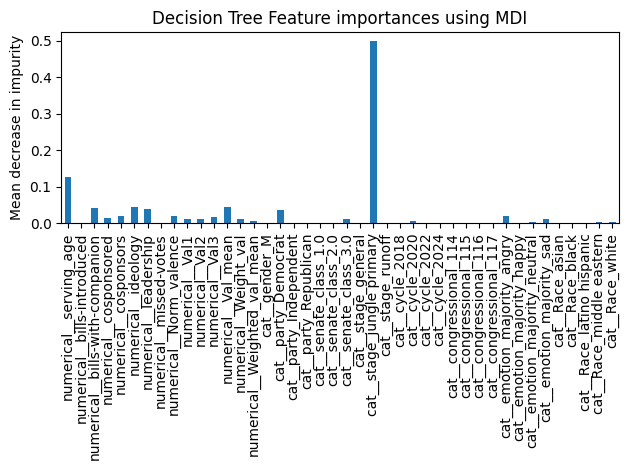

In [107]:
feature_names = dtr_pipeline[:-1].get_feature_names_out()
forest_importances = pd.Series(dtr.feature_importances_, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Decision Tree Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### Other Methods
K Nearest Neighbors Regressor

Requires Encoding

In [108]:
# https://medium.com/@agrawalsam1997/hyperparameter-tuning-of-knn-classifier-a32f31af25c7
knr_parameters = parameter={'n_neighbors': np.arange(2, 30, 1)}

In [109]:
knr = KNeighborsRegressor(n_neighbors=2)

In [110]:
knr_pipeline = Pipeline(steps=[('preprocessor', ctprocessor), ('model',GridSearchCV(knr, knr_parameters, n_jobs=2))])
knr_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('min_scaler',
                                                                   MinMaxScaler())]),
                                                  ['serving_age',
                                                   'bills-introduced',
                                                   'bills-with-companion',
                                                   'cosponsored', 'cosponsors',
                                                   'ideology', 'leadership',
                                                   'missed-votes',
                                                   'Norm_valence', 'Val1',
                                                   'Val2', 'Val3', 'Val_mean',
                                                   'Weight_val',
                                                   'Weighted_val_mean']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'party',
                                                   'senate_class', 'stage',
                                                   'cycle', 'congressional',
                                                   'emotion_majority',
                                                   'Race'])])),
                ('model',
                 GridSearchCV(estimator=KNeighborsRegressor(n_neighbors=2),
                              n_jobs=2,
                              param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}))])

In [111]:
knr_pipeline[1].best_params_

{'n_neighbors': 7}

In [112]:
knr = knr_pipeline[1].best_estimator_

##### Training Scores
Refer to this for evaluation of train/test scores: https://datascience.stackexchange.com/questions/70054/interpretation-for-test-score-training-score-and-validation-score-in-machine-l

In [113]:
knr_train_scores = evaluate_model(knr,X_train,y_train)
knr_train_scores

{'mse': 21.44639735068339, 'mae': 3.411749672346003, 'r2': 0.49559066822869846}

##### Testing Scores

In [114]:
knr_scores = evaluate_model(knr,X_test,y_test)
knr_scores

{'mse': 27.854676530016512,
 'mae': 3.8153664958894318,
 'r2': 0.3484515573219179}

### Supervised Methods - Ensemble Learning

#### Random Forest

In [115]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
rf_parameters = {
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 10, 15],
    'n_estimators': [100, 250, 500]
}

In [116]:
rf = RandomForestRegressor(random_state=42)

In [117]:
rf_pipeline = Pipeline(steps=[('preprocessor', ctprocessor), ('model',GridSearchCV(rf, rf_parameters, n_jobs=2))])
rf_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('min_scaler',
                                                                   MinMaxScaler())]),
                                                  ['serving_age',
                                                   'bills-introduced',
                                                   'bills-with-companion',
                                                   'cosponsored', 'cosponsors',
                                                   'ideology', 'leadership',
                                                   'missed-votes',
                                                   'Norm_valence', 'Val1',
                                                   'Val2', 'Val3', 'Val_mean',
                                                   'Weight_val',
                                                   'Weighted_val_mean']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'party',
                                                   'senate_class', 'stage',
                                                   'cycle', 'congressional',
                                                   'emotion_majority',
                                                   'Race'])])),
                ('model',
                 GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              n_jobs=2,
                              param_grid={'min_samples_leaf': [1, 3, 5],
                                          'min_samples_split': [2, 10, 15],
                                          'n_estimators': [100, 250, 500]}))])

In [118]:
rf_pipeline[1].best_params_

{'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 500}

In [119]:
rf = rf_pipeline[1].best_estimator_

##### Training Scores
Refer to this for evaluation of train/test scores: https://datascience.stackexchange.com/questions/70054/interpretation-for-test-score-training-score-and-validation-score-in-machine-l

In [120]:
rf_train_scores = evaluate_model(rf,X_train,y_train)
rf_train_scores

{'mse': 19.03580956615941, 'mae': 3.12812358448097, 'r2': 0.551905711051141}

##### Testing Scores

In [121]:
rf_scores = evaluate_model(rf,X_test,y_test)
rf_scores

{'mse': 22.505071885049247,
 'mae': 3.2852323678059525,
 'r2': 0.4631292549428164}

Feature importance based on mean decrease in impurity

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

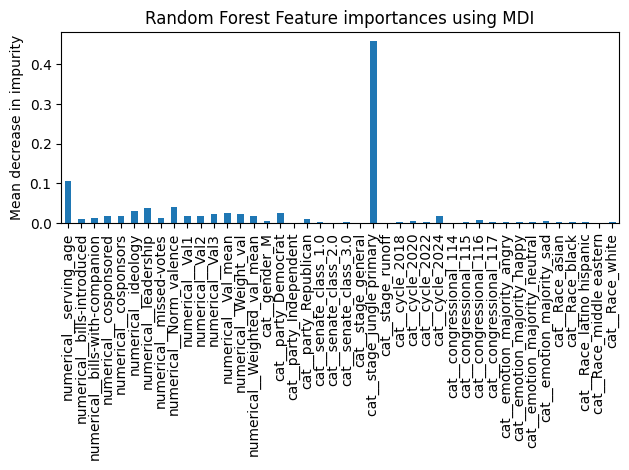

In [123]:
feature_names = rf_pipeline[:-1].get_feature_names_out()
forest_importances = pd.Series(rf.feature_importances_, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Random Forest Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### XGBoost

In [124]:
X_train_xgb = X_train.copy()
X_train_xgb[categorical_features] = X_train[categorical_features].astype("category")
X_test_xgb = X_test.copy()
X_test_xgb[categorical_features] = X_test[categorical_features].astype("category")

In [125]:
# https://medium.com/@rithpansanga/optimizing-xgboost-a-guide-to-hyperparameter-tuning-77b6e48e289d
xgbr_parameters = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.3, 0.6],
    'subsample': [0.5, 1],
    'n_estimators': [50, 100, 200]
}

In [126]:
xgbr = xgb.XGBRegressor(tree_method="hist", enable_categorical=True)

In [127]:
xgbr_pipeline = GridSearchCV(xgbr, xgbr_parameters, n_jobs=2)
xgbr_pipeline.fit(X_train_xgb,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=True, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=2,
             param_grid={'learning_rate': [0.1, 0.3, 0.6],
                         'max_depth': [3, 6, 9], 'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 1]})

In [128]:
xgbr_pipeline.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}

In [129]:
xgbr = xgbr_pipeline.best_estimator_

##### Training Scores
Refer to this for evaluation of train/test scores: https://datascience.stackexchange.com/questions/70054/interpretation-for-test-score-training-score-and-validation-score-in-machine-l

In [132]:
xgbr_train_scores = evaluate_model(xgbr,X_train_xgb,y_train)
xgbr_train_scores

{'mse': 18.765550135868185,
 'mae': 3.1895526679283983,
 'r2': 0.5575463635690328}

##### Testing Scores

In [133]:
xgbr_scores = evaluate_model(xgbr,X_test_xgb,y_test)
xgbr_scores

{'mse': 23.64677484304256, 'mae': 3.460368065717123, 'r2': 0.4396298673168261}

Feature importance based on mean decrease in impurity

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

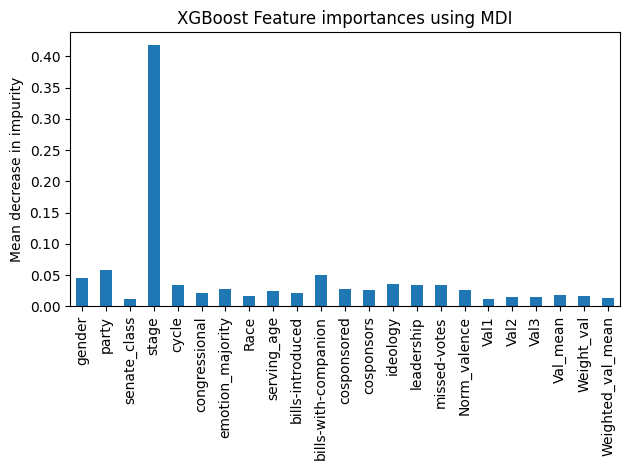

In [134]:
forest_importances = pd.Series(xgbr.feature_importances_, index=xgbr.feature_names_in_)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("XGBoost Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### XGBoost WITH OHE and Scaling

In [135]:
# https://medium.com/@rithpansanga/optimizing-xgboost-a-guide-to-hyperparameter-tuning-77b6e48e289d
xgbr_preproc_parameters = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.3, 0.6],
    'subsample': [0.5, 1],
    'n_estimators': [50, 100, 200]
}

In [136]:
xgbr_preproc = xgb.XGBRegressor(tree_method="hist")

In [137]:
xgbr_preproc_pipeline = Pipeline(steps=[('preprocessor', ctprocessor), ('model',GridSearchCV(xgbr_preproc, xgbr_preproc_parameters, n_jobs=2))])
xgbr_preproc_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('min_scaler',
                                                                   MinMaxScaler())]),
                                                  ['serving_age',
                                                   'bills-introduced',
                                                   'bills-with-companion',
                                                   'cosponsored', 'cosponsors',
                                                   'ideology', 'leadership',
                                                   'missed-votes',
                                                   'Norm_valence', 'Val1',
                                                   'Val2', 'Val3', 'Val_mean',
                                                   'Weight_val',
                                                   'Weighted_val_mean']),
                                                 ('cat',
                                                  OneHotEncoder...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...),
                              n_jobs=2,
                              param_grid={'learning_rate': [0.1, 0.3, 0.6],
                                          'max_depth': [3, 6, 9],
                                          'n_estimators': [50, 100, 200],
                                          'subsample': [0.5, 1]}))])

In [138]:
xgbr_preproc_pipeline[1].best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}

In [139]:
xgbr_preproc = xgbr_preproc_pipeline[1].best_estimator_

##### Training Scores
Refer to this for evaluation of train/test scores: https://datascience.stackexchange.com/questions/70054/interpretation-for-test-score-training-score-and-validation-score-in-machine-l

In [140]:
xgbr_preproc_train_scores = evaluate_model(xgbr_preproc,X_train,y_train)
xgbr_preproc_train_scores

{'mse': 18.765550135868185,
 'mae': 3.1895526679283983,
 'r2': 0.5575463635690328}

##### Testing Scores

In [141]:
xgbr_preproc_scores = evaluate_model(xgbr_preproc,X_test,y_test)
xgbr_preproc_scores

{'mse': 23.64677484304256, 'mae': 3.460368065717123, 'r2': 0.4396298673168261}

Feature importance based on mean decrease in impurity

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

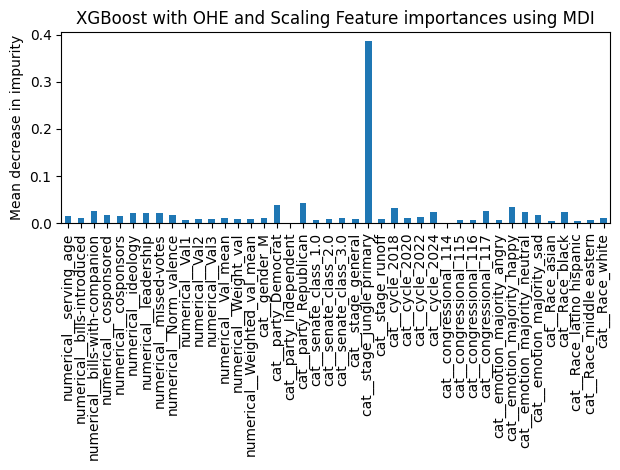

In [142]:
feature_names = xgbr_preproc_pipeline[:-1].get_feature_names_out()
forest_importances = pd.Series(xgbr_preproc.feature_importances_, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("XGBoost with OHE and Scaling Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### CatBoost
No Feature Processing Needed

https://catboost.ai/en/docs/features/categorical-features

In [143]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.5 MB/s eta 0:00:00


In [144]:
from catboost import CatBoostRegressor, Pool

In [145]:
# https://www.projectpro.io/recipes/find-optimal-parameters-for-catboost-using-gridsearchcv-for-regression
cbr_parameters = {
    'iterations': [100, 250, 500],
    'learning_rate': [0.1, 0.4, 0.6],
    'depth':[1, 3, 6],
}

In [159]:
X_train[categorical_features] = X_train[categorical_features].astype('string')
X_test[categorical_features] = X_test[categorical_features].astype('string')

X_train[categorical_features].dtypes

gender              string[python]
party               string[python]
senate_class        string[python]
stage               string[python]
cycle               string[python]
congressional       string[python]
emotion_majority    string[python]
Race                string[python]
dtype: object

In [160]:
pool_train = Pool(X_train, y_train, cat_features = categorical_features)
pool_test = Pool(X_test, cat_features = categorical_features)

In [161]:
# https://towardsdatascience.com/how-do-you-use-categorical-features-directly-with-catboost-947b211c2923
cbr = CatBoostRegressor(loss_function='RMSE', task_type='CPU',random_state=1,verbose=False)
grid_search_result = cbr.grid_search(cbr_parameters, pool_train,verbose=False)


bestTest = 5.534683775
bestIteration = 98


bestTest = 5.196811788
bestIteration = 99


bestTest = 5.033390617
bestIteration = 99


bestTest = 5.322470012
bestIteration = 247


bestTest = 4.970593476
bestIteration = 248


bestTest = 4.865191913
bestIteration = 233


bestTest = 5.12684174
bestIteration = 498


bestTest = 4.87759114
bestIteration = 498


bestTest = 4.781239643
bestIteration = 457


bestTest = 5.115327603
bestIteration = 99


bestTest = 4.749785898
bestIteration = 91


bestTest = 4.703400568
bestIteration = 77


bestTest = 4.808646829
bestIteration = 247


bestTest = 4.764880284
bestIteration = 169


bestTest = 4.732622636
bestIteration = 158


bestTest = 4.702743299
bestIteration = 499


bestTest = 4.764880284
bestIteration = 169


bestTest = 4.732622636
bestIteration = 158


bestTest = 5.046328362
bestIteration = 99


bestTest = 5.028324981
bestIteration = 73


bestTest = 4.833433287
bestIteration = 57


bestTest = 4.992668778
bestIteration = 246


bestTest = 5.2311128

In [162]:
grid_search_result['params']

{'depth': 3, 'learning_rate': 0.1, 'iterations': 500}

In [163]:
cbr.get_params()

{'loss_function': 'RMSE',
 'verbose': False,
 'task_type': 'CPU',
 'random_state': 1,
 'depth': 3,
 'learning_rate': 0.1,
 'iterations': 500}

##### Training Scores
Refer to this for evaluation of train/test scores: https://datascience.stackexchange.com/questions/70054/interpretation-for-test-score-training-score-and-validation-score-in-machine-l

In [164]:
train_predictions = cbr.predict(pool_train)

In [165]:
cbr_train_mse = mean_squared_error(y_train, train_predictions)
cbr_train_mae = mean_absolute_error(y_train, train_predictions)
cbr_train_r2 = r2_score(y_train, train_predictions)

In [166]:
cbr_train_scores = {'mse':cbr_train_mse,'mae':cbr_train_mae,'r2':cbr_train_r2}
cbr_train_scores

{'mse': 14.269039398135059, 'mae': 2.872752266235033, 'r2': 0.665185099524283}

##### Testing Scores

In [167]:
test_predictions = cbr.predict(pool_test)

In [168]:
cbr_mse = mean_squared_error(y_test, test_predictions)
cbr_mae = mean_absolute_error(y_test, test_predictions)
cbr_r2 = r2_score(y_test, test_predictions)

In [169]:
cbr_scores = {'mse':cbr_mse,'mae':cbr_mae,'r2':cbr_r2}
cbr_scores

{'mse': 18.322665858467328,
 'mae': 3.0709160225760437,
 'r2': 0.5787477578436129}

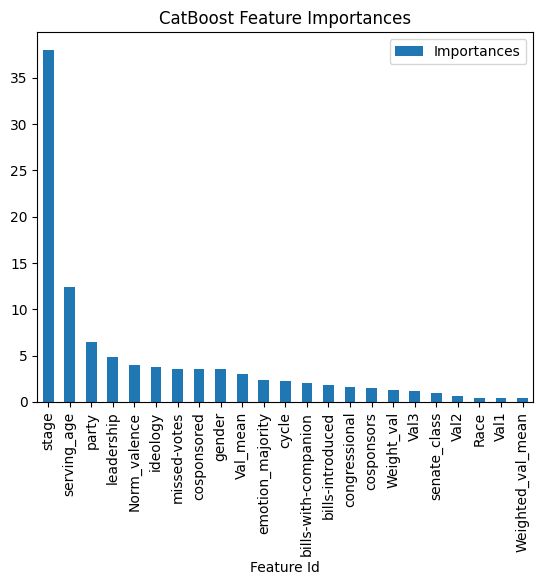

In [170]:
cbr.get_feature_importance(prettified=True).plot.bar(x='Feature Id', y='Importances')
plt.xticks(rotation=90)
plt.title("CatBoost Feature Importances")
fig.tight_layout()

#### CatBoost WITH OneHotEncoding and StdScaler Transformed Data

https://catboost.ai/en/docs/features/categorical-features

In [171]:
ctprocessor.fit(X_train)

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('min_scaler',
                                                  MinMaxScaler())]),
                                 ['serving_age', 'bills-introduced',
                                  'bills-with-companion', 'cosponsored',
                                  'cosponsors', 'ideology', 'leadership',
                                  'missed-votes', 'Norm_valence', 'Val1',
                                  'Val2', 'Val3', 'Val_mean', 'Weight_val',
                                  'Weighted_val_mean']),
                                ('cat',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore'),
                                 ['gender', 'party', 'senate_class', 'stage',
                                  'cycle', 'congressional', 'emotion_majority',
                                  'Race'])])

In [172]:
X_train_t = ctprocessor.transform(X_train)
X_test_t = ctprocessor.transform(X_test)

In [173]:
features = ctprocessor.get_feature_names_out()
X_train_t = pd.DataFrame(X_train_t, columns=features)
X_test_t = pd.DataFrame(X_test_t, columns=features)

In [174]:
# https://towardsdatascience.com/how-do-you-use-categorical-features-directly-with-catboost-947b211c2923
cbr_t = CatBoostRegressor(n_estimators=200,loss_function='RMSE',learning_rate=0.4,depth=3, task_type='CPU',random_state=1,verbose=False)

In [175]:
pool_train_t = Pool(X_train_t, y_train)
pool_test_t = Pool(X_test_t)

In [176]:
cbr_t.fit(pool_train_t)

##### Training Scores
Refer to this for evaluation of train/test scores: https://datascience.stackexchange.com/questions/70054/interpretation-for-test-score-training-score-and-validation-score-in-machine-l

In [177]:
train_predictions_t = cbr_t.predict(pool_train_t)

In [178]:
cbr_train_mse_t = mean_squared_error(y_train, train_predictions_t)
cbr_train_mae_t = mean_absolute_error(y_train, train_predictions_t)
cbr_train_r2_t = r2_score(y_train, train_predictions_t)

In [179]:
cbr_train_scores_t = {'mse':cbr_train_mse_t,'mae':cbr_train_mae_t,'r2':cbr_train_r2_t}
cbr_train_scores_t

{'mse': 10.788005615422833, 'mae': 2.471238466476572, 'r2': 0.7468655789869532}

##### Testing Scores

In [180]:
test_predictions_t = cbr_t.predict(pool_test_t)

In [181]:
cbr_mse_t = mean_squared_error(y_test, test_predictions_t)
cbr_mae_t = mean_absolute_error(y_test, test_predictions_t)
cbr_r2_t = r2_score(y_test, test_predictions_t)

In [182]:
cbr_scores_t = {'mse':cbr_mse_t,'mae':cbr_mae_t,'r2':cbr_r2_t}
cbr_scores_t

{'mse': 18.517428205240385,
 'mae': 3.0857841467853806,
 'r2': 0.5742700210393981}

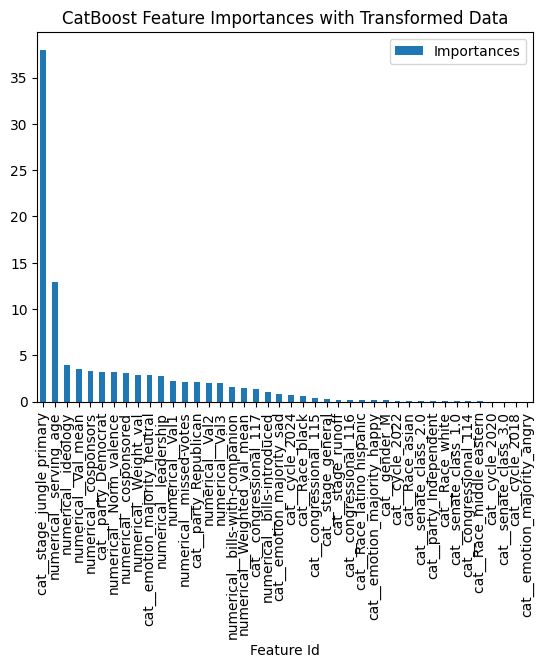

In [183]:
cbr_t.get_feature_importance(prettified=True).plot.bar(x='Feature Id', y='Importances')
plt.xticks(rotation=90)
plt.title("CatBoost Feature Importances with Transformed Data")
fig.tight_layout()

In [ ]:
# TODO: Properly Extract Feature Names

#### CatBoost Witholding Emotion Features
No Feature Processing Needed

https://catboost.ai/en/docs/features/categorical-features

In [ ]:
# https://towardsdatascience.com/how-do-you-use-categorical-features-directly-with-catboost-947b211c2923
cbr_ne = CatBoostRegressor(n_estimators=200,loss_function='RMSE',learning_rate=0.4,depth=3, task_type='CPU',random_state=1,verbose=False)

In [ ]:
categorical_features_ne = ['gender', 'party', 'senate_class', 'stage', 'cycle', 'race_majority']

In [ ]:
pool_train_ne = Pool(X_train.drop(columns=['emotion_majority','valence_mean']), y_train, cat_features = categorical_features_ne)
pool_test_ne = Pool(X_test.drop(columns=['emotion_majority','valence_mean']), cat_features = categorical_features_ne)

In [ ]:
cbr_ne.fit(pool_train_ne)

##### Training Scores
Refer to this for evaluation of train/test scores: https://datascience.stackexchange.com/questions/70054/interpretation-for-test-score-training-score-and-validation-score-in-machine-l

In [ ]:
train_predictions_ne = cbr_ne.predict(pool_train_ne)

In [ ]:
cbr_train_mse_ne = mean_squared_error(y_train, train_predictions_ne)
cbr_train_mae_ne = mean_absolute_error(y_train, train_predictions_ne)
cbr_train_r2_ne = r2_score(y_train, train_predictions_ne)

In [ ]:
cbr_train_scores_ne = {'mse':cbr_train_mse_ne,'mae':cbr_train_mae_ne,'r2':cbr_train_r2_ne}
cbr_train_scores_ne

{'mse': 18.759931719396654,
 'mae': 3.2107907931881097,
 'r2': 0.6764219834616245}

##### Testing Scores

In [ ]:
test_predictions_ne = cbr_ne.predict(pool_test_ne)

In [ ]:
cbr_mse_ne = mean_squared_error(y_test, test_predictions_ne)
cbr_mae_ne = mean_absolute_error(y_test, test_predictions_ne)
cbr_r2_ne = r2_score(y_test, test_predictions_ne)

In [ ]:
cbr_scores_ne = {'mse':cbr_mse_ne,'mae':cbr_mae_ne,'r2':cbr_r2_ne}
cbr_scores_ne

{'mse': 17.779589875852157, 'mae': 3.102275781013338, 'r2': 0.657956092256357}

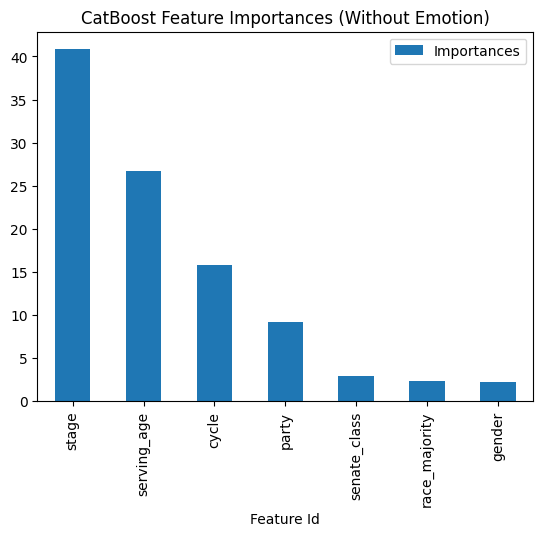

In [ ]:
cbr_ne.get_feature_importance(prettified=True).plot.bar(x='Feature Id', y='Importances')
plt.xticks(rotation=90)
plt.title("CatBoost Feature Importances (Without Emotion)")
fig.tight_layout()

## Modeling Evaulation

In [ ]:
# TODO: Jungle Primary feature importance potentially very interesting - https://politicaldictionary.com/words/jungle-primary/

## Unsupervised Modeling - TODO Week 10!

### KMeans and Hierarchical Clustering

In [ ]:
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
kmeans.labels_
kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [ ]:
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
clustering = AgglomerativeClustering().fit(X)
clustering.labels_

array([1, 1, 1, 0, 0, 0])